# CNN Classification_Keras_Working with image files

We will predict the category of a fruit image.

This notebook guides through creating a CNN (convolutional neural network) using Keras and TensorFlow to categorize pictures of apples. After utilizing ImageDataGenerator to import and preprocess the data, it divides the data into training and validation sets and visually examines the dataset. The CNN model was trained and assessed using this data, and it consists of convolutional, max-pooling, and dense layers. Plots of accuracy and loss are used to show training progress. Finally, a single image is used to showcase the model's prediction abilities and usefulness in image categorization.

In [24]:
import numpy as np
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

np.random.seed(1)  # for reproducibility


This script imports the required libraries for a Python script that uses TensorFlow's Keras API to create and train a Convolutional Neural Network (CNN), mostly for image classification applications. It initializes a sequential model with layers that include convolutional ({Conv2D}), max-pooling ({MaxPooling2D}), flattening ({Flatten}), dense ({Dense}), and dropout ({Dropout}) to minimize overfitting. It also creates a random seed to ensure repeatability. In order to facilitate effective data handling and model training, real-time data augmentation and preprocessing are accomplished using Keras ImageDataGenerator.

# Image Readers

In [25]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # rescale 1./255 to normalize pixel values

training_generator = image_generator.\
    flow_from_directory('C:/Users/vadla/Downloads/ImageData/ImageData/FRUITS/Apples',
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_generator = image_generator.\
    flow_from_directory('C:/Users/vadla/Downloads/ImageData/ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

Found 3879 images belonging to 10 classes.
Found 965 images belonging to 10 classes.


This small piece of code initializes a `ImageDataGenerator` object in TensorFlow Keras to manage preprocessing and augmentation of picture data for neural network training. In addition to splitting the dataset into training and validation sets, with 20% of the data set aside for validation, the generator is configured to rescale the picture pixel values by a factor of 1/255, normalizing them to a range of 0 to 1.The training and validation datasets are prepared using the flow_from_directory method twice: once it loads images from the specified directory (in this case, a folder containing apple images), it resizes them to 32 by 32 pixels, sets a batch size of 32, and defines the class mode as "categorical" for multi-class classification. Data shuffling is turned on for the training generator in order to guarantee that the model is exposed to a variety of data points during training; in contrast, data shuffling is turned off for the validation generator in order to preserve a consistent set of data for assessing model performance. The results show that, in accordance with the intended split ratio, 3879 photos from 10 classes were discovered for training and 965 images for validation.

Let's explore the image files. ImageDataGenerator contains batches whose size was set in the batch_size parameter, let's display the first batch

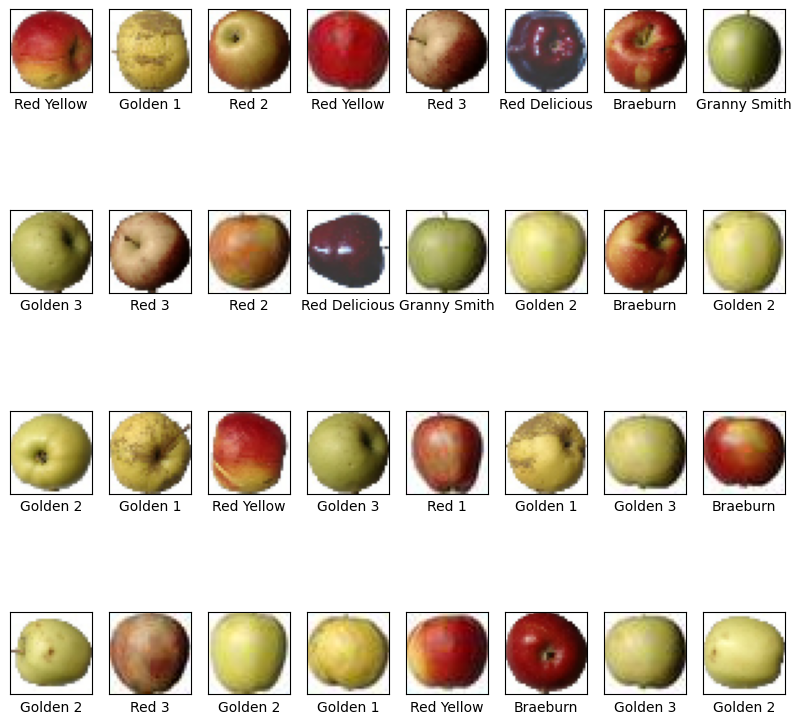

In [26]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices

# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())

# get the first batch of images and associated labels
images, labels = training_generator[0]

# get the size of the batch
batch_size = len(images)

# do some calculations to accomodate the number of images (which is determined by the batch size)
cols = 8
rows = batch_size//cols

# display the images
plt.figure(figsize=(10,10))
for i in range(batch_size):
    plt.subplot(rows,cols,i+1)
# if you prefer to see images without the grid and axes labels, uncomment the following 3 lines    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(training_labels[int(np.argmax(labels[i]))])
plt.show()

This code segment is used to visualize the images from the training dataset along with their labels. Initially, it retrieves the class indices for the apple categories from the `training_generator`, storing them in `apple_name_index`. The class names (or labels) are then extracted and saved in `training_labels`. It loads the first batch of images and their corresponding labels from the training generator. The batch size (number of images) is determined by counting the number of images in this batch.

The code calculates the number of columns (`cols`) and rows (`rows`) needed to display the batch of images in a grid format. The `plt.figure(figsize=(10,10))` line sets up a figure with a specific size to display the images. A loop runs through each image in the batch, placing each image in a subplot of the grid. The images are displayed without axes labels or grid lines for a cleaner look. Each image is labeled with its corresponding class name, determined by finding the label with the highest probability in the one-hot encoded `labels` array. Finally, the grid of images is displayed with `plt.show()`, showcasing a batch of apple images with their respective class names as labels.

## This section simply breaksdown some of the code above to show what is happening... this should be removed in production

In [27]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices
print(apple_name_index)

{'Braeburn': 0, 'Golden 1': 1, 'Golden 2': 2, 'Golden 3': 3, 'Granny Smith': 4, 'Red 1': 5, 'Red 2': 6, 'Red 3': 7, 'Red Delicious': 8, 'Red Yellow': 9}


In [28]:
# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())
print(training_labels)

['Braeburn', 'Golden 1', 'Golden 2', 'Golden 3', 'Granny Smith', 'Red 1', 'Red 2', 'Red 3', 'Red Delicious', 'Red Yellow']


In [29]:
# get the first batch of images and associated labels
images, labels = training_generator[0]

In [30]:
print(images.shape) # we have 32 images (our batch size) of size 32x32 with 3 channels (RGB)

(32, 32, 32, 3)


In [31]:
print(labels) # we have 32 labels (our batch size) one-hot encoded with 10 classes

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [32]:
# this will take the index for the max value in each one-hot vector and return the class name
print(labels[1])
print(np.argmax(labels[1]))
print(training_labels[int(np.argmax(labels[1]))])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
Golden 1


This code snippet retrieves and explores the classes and images from a dataset loaded via a Keras `ImageDataGenerator`. First, it accesses the `class_indices` of the `training_generator` to obtain a dictionary mapping the class names of apples (like 'Braeburn', 'Golden 1', etc.) to their respective numerical indices. This mapping (`apple_name_index`) is printed, showing each apple variety mapped to a unique number.

Next, the class names are extracted from `class_indices` and stored in `training_labels`, providing a list of all apple types in the dataset. The script then fetches the first batch of images and labels from the `training_generator`. The shape of `images` indicates that the batch contains 32 images, each resized to 32x32 pixels with 3 color channels (RGB).

The `labels` array contains one-hot encoded vectors representing the class of each image in the batch, where each vector has a length equal to the number of classes (10 in this case), with a '1' marking the true class. By examining a single label vector (`labels[1]`), the code illustrates how to identify the class of an image: it finds the index of the maximum value in the one-hot vector, which corresponds to the class index, and then maps this index to the actual class name using `training_labels`. This process is demonstrated for one sample, showing that the second image in the batch belongs to the 'Golden 1' class.

# Model

To find more about Convulutional layers, see the official documentation found here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [33]:
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.1))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(10, activation='softmax'))

C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [34]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#train the model
history = model.fit(training_generator, validation_data=(validation_generator), epochs=5, verbose=0)

C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


This code builds and trains a Convolutional Neural Network (CNN) model using the Keras `Sequential` API. The model starts with a convolutional layer having 64 filters of size 3x3 and 'relu' activation, designed to process input images of size 32x32 pixels with 3 color channels (RGB). This is followed by a max-pooling layer that reduces the spatial dimensions by half. The process is repeated with another convolutional layer with the same configuration but without specifying the input shape, as it is automatically inferred, followed by another max-pooling layer.

The network then flattens the multi-dimensional output to a one-dimensional array to connect to a dense layer, which consists of 128 neurons with 'relu' activation, serving as a fully connected layer that can learn non-linear combinations of the high-level features extracted by the convolutional layers. The final layer is a dense layer with 10 neurons and 'softmax' activation, corresponding to the 10 classes of apples, which outputs the probability distribution over the classes.

The model is compiled with the 'adam' optimizer and 'categorical_crossentropy' loss function, using accuracy as the performance metric. Training is performed using the `fit` method on the `training_generator` data, with the `validation_generator` data serving as validation during training. The model trains for 5 epochs, and the training process's details are stored in `history`, which can later be used for analysis of the training and validation process.

# Summarize the model and it's performance

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,005,152 (3.83 MB)

 Trainable params: 335,050 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 670,102 (2.56 MB)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confution Matrix and Classification Report
#Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# y_test is the actual labels
y_test = validation_generator.classes

#target_names = species of apples (class names)
target_names = list(training_generator.class_indices.keys())

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [38]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

               precision    recall  f1-score   support

     Braeburn     0.5868    1.0000    0.7396        98
     Golden 1     0.5765    1.0000    0.7313        98
     Golden 2     1.0000    1.0000    1.0000        98
     Golden 3     0.9143    1.0000    0.9552        96
 Granny Smith     1.0000    0.9082    0.9519        98
        Red 1     1.0000    1.0000    1.0000        98
        Red 2     1.0000    0.2959    0.4567        98
        Red 3     1.0000    1.0000    1.0000        85
Red Delicious     1.0000    1.0000    1.0000        98
   Red Yellow     1.0000    0.2653    0.4194        98

     accuracy                         0.8446       965
    macro avg     0.9078    0.8469    0.8254       965
 weighted avg     0.9065    0.8446    0.8228       965



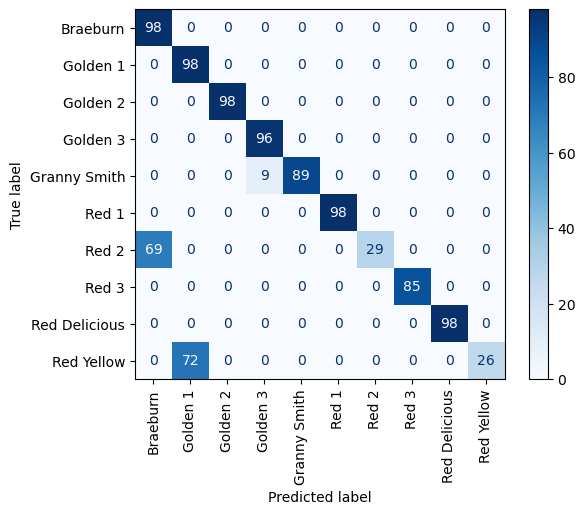

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

# display the confusion matrix
#y_test = validation_generator.classes
#y_pred = model.predict(validation_generator).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

This section of the code evaluates the performance of a trained Convolutional Neural Network (CNN) model on image classification. The `model.summary()` command prints a summary of the CNN architecture, detailing each layer's type, output shape, and the number of parameters. This model consists of convolutional layers, max-pooling layers, a flattening layer, and dense layers, ending with a total of over 1 million parameters.

Following the model summary, the code uses the trained model to predict classes for the validation set. The `predict` method generates predicted probabilities for each class, and `np.argmax` is applied to these predictions to obtain the most likely class for each image. These predictions (`y_pred`) are compared with the actual labels (`y_test`) from the validation generator to compute the classification report and confusion matrix, which provide detailed performance metrics such as precision, recall, f1-score for each class, and overall accuracy.

The `classification_report` function from `sklearn.metrics` produces a summary of the prediction accuracy for each class, showing how well the model can classify each type of apple. The confusion matrix, visualized with `ConfusionMatrixDisplay`, further illustrates the model's performance by showing the actual versus predicted classifications, allowing for a more detailed analysis of where the model performs well and where it confuses between classes. The displayed matrix and report together offer comprehensive insight into the model's classification accuracy and areas for potential improvement.

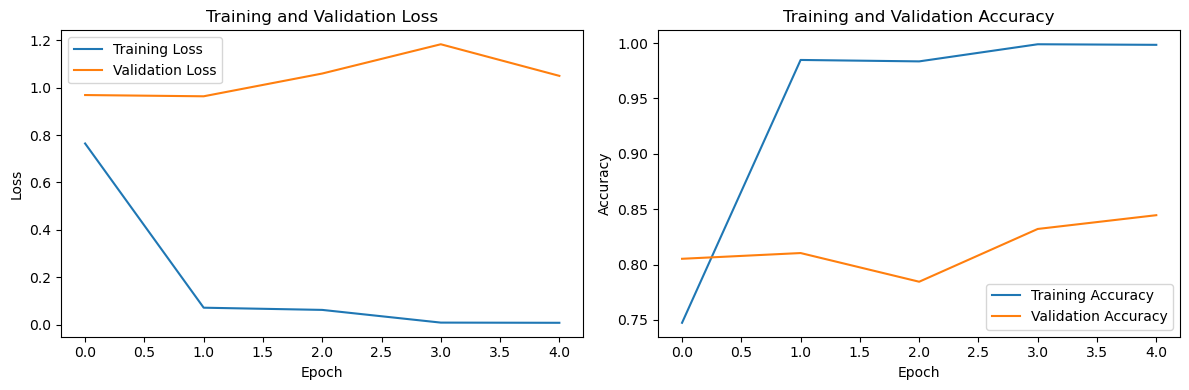

In [40]:
# Define the plotting function
def plot_metric(subplot_position, metric_name, title, xlabel, ylabel):
    plt.subplot(1, 2, subplot_position)
    plt.plot(history.history[metric_name], label=f'Training {metric_name.capitalize()}')
    plt.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.capitalize()}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

# Set the figure size
plt.figure(figsize=(12, 4))

# Plot loss
plot_metric(1, 'loss', 'Training and Validation Loss', 'Epoch', 'Loss')

# Plot accuracy
plot_metric(2, 'accuracy', 'Training and Validation Accuracy', 'Epoch', 'Accuracy')

plt.tight_layout()
plt.show()


This code defines a function `plot_metric` to visualize the training history of a machine learning model, specifically plotting metrics like loss and accuracy for both training and validation phases. The function takes parameters to customize the subplot's position, metric name, chart title, x-label, and y-label. Inside the function, `plt.subplot` is used to position the chart in a figure grid, and `plt.plot` draws the lines representing the training and validation metrics over epochs, with appropriate labels and titles.

The plotting starts by setting the figure size to 12 by 4 inches. Then, the `plot_metric` function is called twice: first, to plot the training and validation loss over epochs, and second, to plot the training and validation accuracy. These plots help in visually assessing how the model's performance changes over time during the training process. The function plots the specified metrics, labels the axes, adds a legend to distinguish between training and validation, and titles each subplot. After plotting, `plt.tight_layout()` is called to automatically adjust the subplot parameters for a neat layout, and `plt.show()` displays the final figure with the plotted metrics, providing a clear visual representation of the model's learning dynamics over the epochs.

# Predict a single image

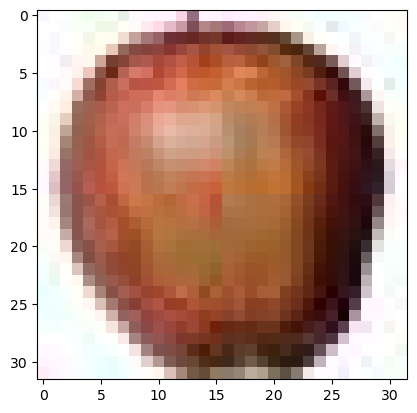

In [41]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img = load_img(
     'C:/Users/vadla/Downloads/ImageData/ImageData/FRUITS/Apples/Red 1/15_100.jpg',
    color_mode='rgb',
    target_size=(32,32)
)

plt.imshow(img)

In [42]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[2.74841527e-09, 5.91997527e-08, 2.66111028e-15, 5.13563757e-12,
        1.01156326e-10, 9.98634040e-01, 7.71462292e-05, 1.27827225e-03,
        1.03596049e-05, 1.35411575e-08]], dtype=float32)

In [43]:
#since the output above is difficult to read, let's round
np.round(model.predict(img_rank4),2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [44]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img_rank4), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([5], dtype=int64)

In [45]:
# To get the label, we need to get the class indices from the training generator
label_map = (training_generator.class_indices)
label_map

{'Braeburn': 0,
 'Golden 1': 1,
 'Golden 2': 2,
 'Golden 3': 3,
 'Granny Smith': 4,
 'Red 1': 5,
 'Red 2': 6,
 'Red 3': 7,
 'Red Delicious': 8,
 'Red Yellow': 9}

In [46]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'Red 1'

Outr model predicted "Red 1" which is correct!

This code demonstrates loading, preprocessing, and predicting the class of an image using a trained Convolutional Neural Network (CNN) model. Initially, it loads an image of an apple ('Red 1') using the `load_img` function from Keras, specifying the color mode as RGB and resizing the image to 32x32 pixels. The image is then displayed using `plt.imshow`.

Next, the image is converted to a NumPy array with `img_to_array`, and the pixel values are normalized to the range 0-1 by dividing by 255. The normalized image array is then reshaped (using `np.expand_dims`) to fit the model's input requirements, effectively adding an extra dimension to represent the batch size, which is necessary for the model to process the image.

The model's `predict` method is then called with this reshaped array to generate predictions. The prediction results are an array of probabilities across the potential classes, indicating the model's confidence level for each class. The `np.argmax` function is used to find the index of the highest probability, identifying the most likely class for the image. In this case, the model predicts the class index as 5, which corresponds to 'Red 1' in the class indices map obtained from the `training_generator`. Therefore, the model successfully identifies the image as a 'Red 1' apple, demonstrating its capability to classify images based on learned features.